In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as nup
import re
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/Users/ikbalhossain/Documents/projects/twiter_reddit/Twitter_Data.csv')

In [3]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [4]:
df=df.drop(labels='category',axis=1)

In [5]:
df=df.head(100)
df.rename({'clean_text':'Tweets'},axis=1,inplace=True)
df

,Tweets
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...
...,...
95,country prospers when the women the country ar...
96,sabbash mera vote for peppermit abvp
97,yogi adityanath hold 100 rallies seek votes fo...
98,from the very beginningmodi doing wada faramos...


In [7]:
# create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create function to get polarity 
def getPolarity(text):
    return TextBlob(text).sentiment.polarity



In [8]:
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)


Polarity(-1,+1)||| 
-1, is negative sentiment 
+1, is positive sentiment 

higher subjectivity means that the text contains personal opinion rather than factual information.

In [9]:
df

,Tweets,Subjectivity,Polarity
0,when modi promised “minimum government maximum...,0.700000,-0.300000
1,talk all the nonsense and continue all the dra...,0.000000,0.000000
2,what did just say vote for modi welcome bjp t...,0.616667,0.483333
3,asking his supporters prefix chowkidar their n...,0.658333,0.150000
4,answer who among these the most powerful world...,0.750000,0.400000
...,...,...,...
95,country prospers when the women the country ar...,0.000000,0.000000
96,sabbash mera vote for peppermit abvp,0.000000,0.000000
97,yogi adityanath hold 100 rallies seek votes fo...,0.000000,0.000000
98,from the very beginningmodi doing wada faramos...,0.300000,-0.150000


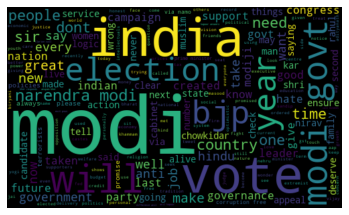

In [11]:
# WordCloud
allWords= ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis']=df['Polarity'].apply(getAnalysis)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweets        100 non-null    object 
 1   Subjectivity  100 non-null    float64
 2   Polarity      100 non-null    float64
 3   Analysis      100 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.2+ KB


In [46]:
Negative= df.loc[df['Analysis']=='Negative']

In [57]:
#print all positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+ ') '+sortedDF['Tweets'][i])
        print()
        j=j+1

1) what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax

2) asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars

3) answer who among these the most powerful world leader today trump putin modi may 

4) with upcoming election india saga going important pair look current modi leads govt elected with deal brexit combination this weekly looks juicy bears imho 

5) gandhi was gay does modi  

6) things like demonetisation gst goods and services tax…the upper castes would sort either view favourably say that need give this more time other castes like dalits the muslims were more against because that’ just not modi’ constituency2

7) hope tuthukudi people would prefer honest well behaved nationalist courageous likly minister modi cabinet vote benifit thuthukudi 

8) calm

In [58]:
#print all Negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+ ') '+sortedDF['Tweets'][i])
        print()
        j=j+1

1) when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

2) vote such party and leadershipwho can take fast and firm action none other than narendra damodardas modi and bjp party 

3) didn’ write chowkidar does mean ’ anti modi try visit the plz not all who haven’ used are anti 

4) with firm belief the leadership shri narendra modi bjp entering into politics given form file nomination for the khammam parliamentary seat proceeding khammam today 

5) sultanpur uttar pradesh loksabha candidate select pawan kumar pandey actually public want given vote modi but your current condidate not popular district your candidate bsp candidate sonbhadra singh

6) thiugh nehru not alive but still alive heart modi for every failure nehru responsible 

7) modi govts slashing indias education budget clear indicator that they dont care for indias fut

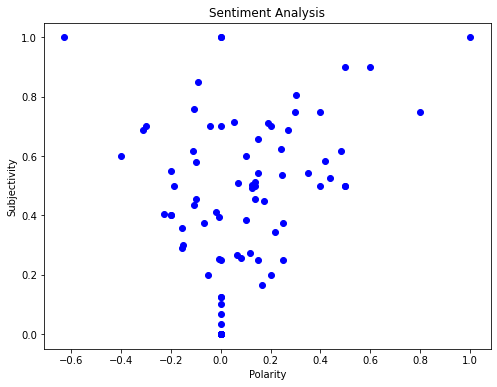

In [60]:
# Polarity subjectivity
plt.figure(figsize=(8,6))
plt.scatter(df['Polarity'],df['Subjectivity'],color='Blue')


plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

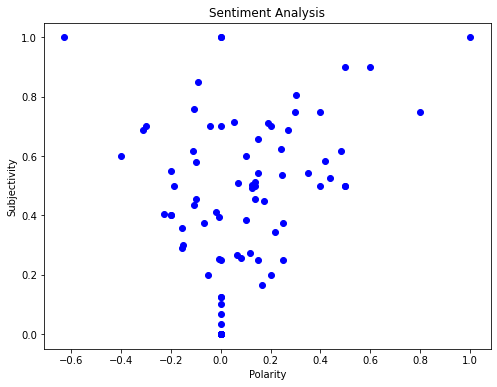

In [62]:
plt.figure(figsize=(8,6))

for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')


plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

<AxesSubplot:>

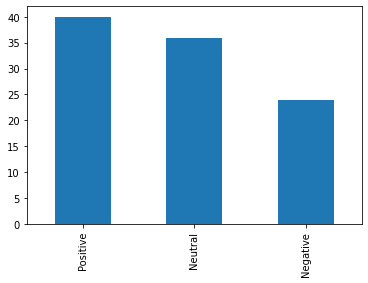

In [66]:
df['Analysis'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Analysis', ylabel='Subjectivity'>

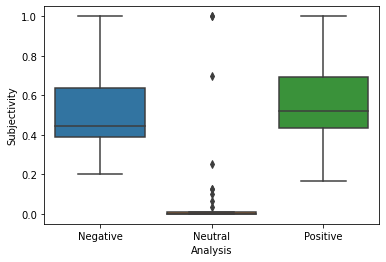

In [101]:
sns.boxplot(y=df['Subjectivity'],x=df['Analysis'])
        

<AxesSubplot:xlabel='Polarity', ylabel='Subjectivity'>

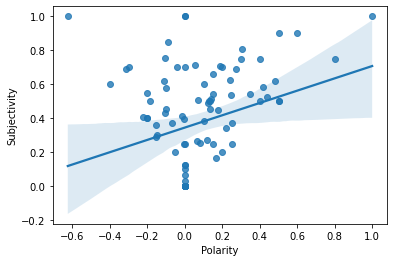

In [106]:
sns.regplot(data=df,x='Polarity',y='Subjectivity')

In [111]:
corr=df[['Polarity','Subjectivity']].corr()
corr

,Polarity,Subjectivity
Polarity,1.000000,0.275405
Subjectivity,0.275405,1.000000


<AxesSubplot:>

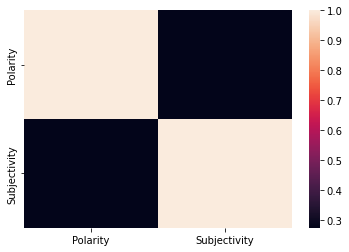

In [110]:
sns.heatmap(corr)